# Avacado Project
# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing Dataset

In [175]:
avacado_data=pd.read_csv('avocado.csv')
avacado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Understanding the data

In [39]:
## dropping the column as it contain only index
avacado_data.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [40]:
# Description of data_set
avacado_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
avacado_data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [41]:
# creating two new columns for analysis from date
avacado_data['Month']=0
avacado_data['Day']=0
for i in range(len(avacado_data.Date)):
    k=avacado_data.Date[i].split("-")
    avacado_data['Month'][i]=k[1]
    avacado_data['Day'][i]=k[2]

In [42]:
avacado_data.drop(['Date'],axis=1,inplace=True)
avacado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## Exploratory Data Analysis

In [43]:
#Checking shape of dataset
avacado_data.shape

(18249, 14)

In [44]:
# checking for duplicate values
avacado_data.duplicated().sum()

0

In [45]:
#Checking for null values 
avacado_data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

## Data Visualization

### univariate Analysis(for every column)

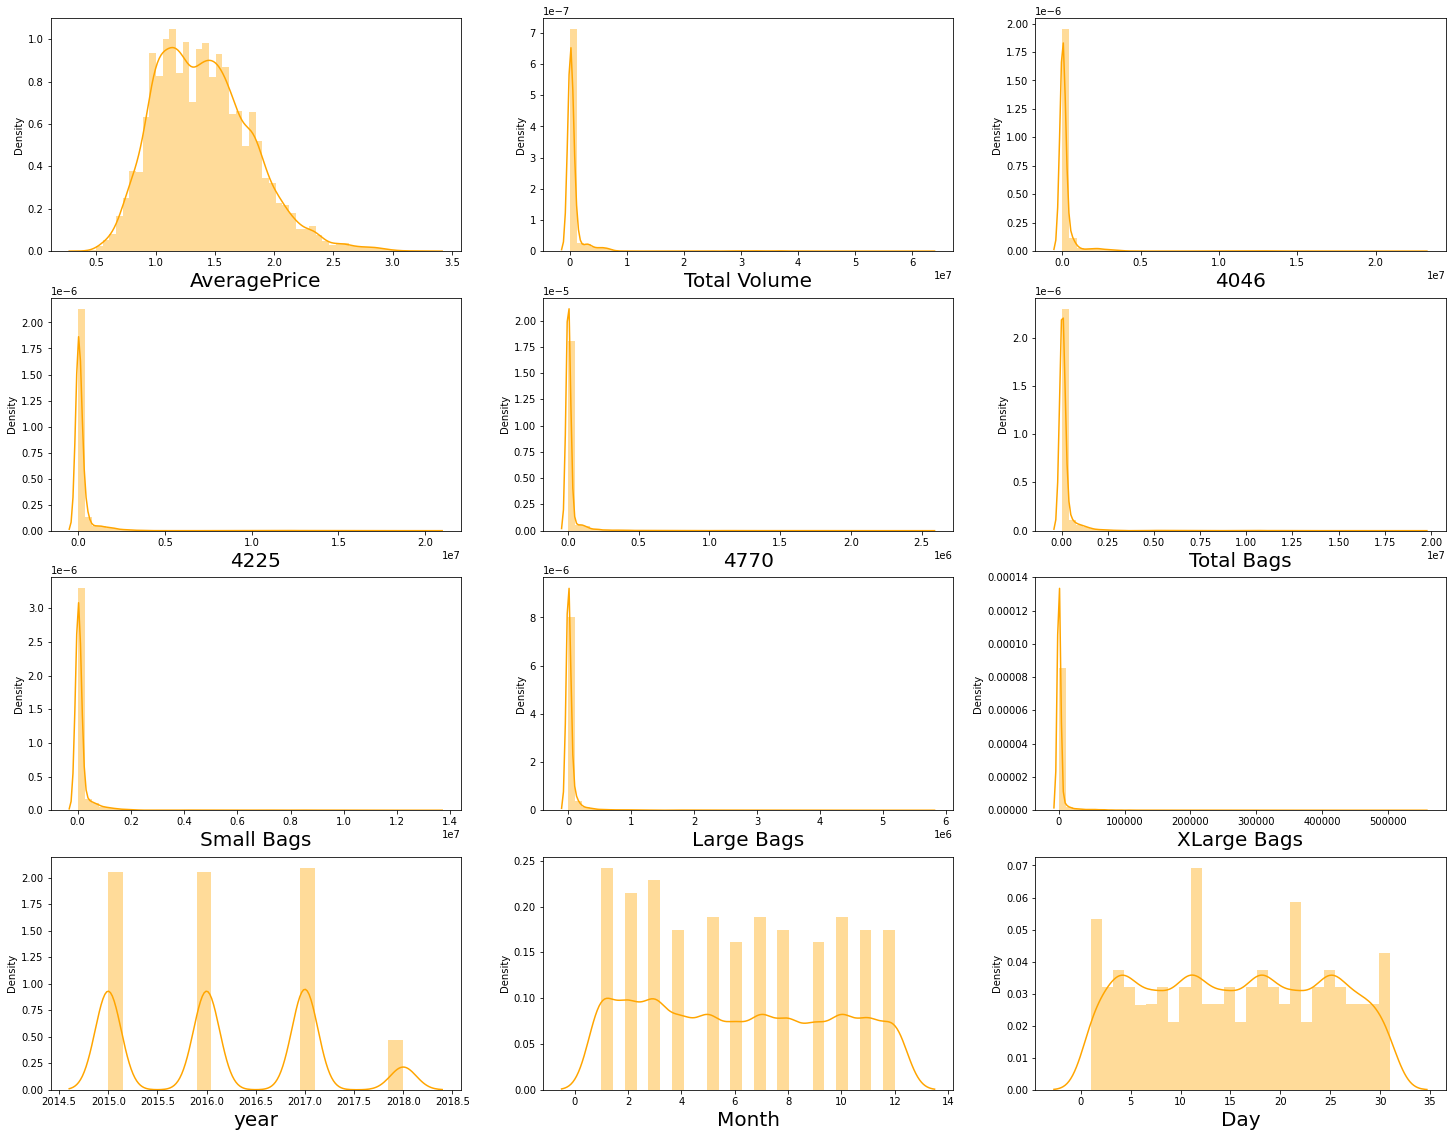

In [46]:
# distribution of data by density
plt.figure(figsize = (25,30))
plotnumber = 1

for col in avacado_data.drop(['region','type'], axis = 1):
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(avacado_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

observation: columns that are not normally distributed most of the data is  left - skewed

In [47]:
avacado_data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

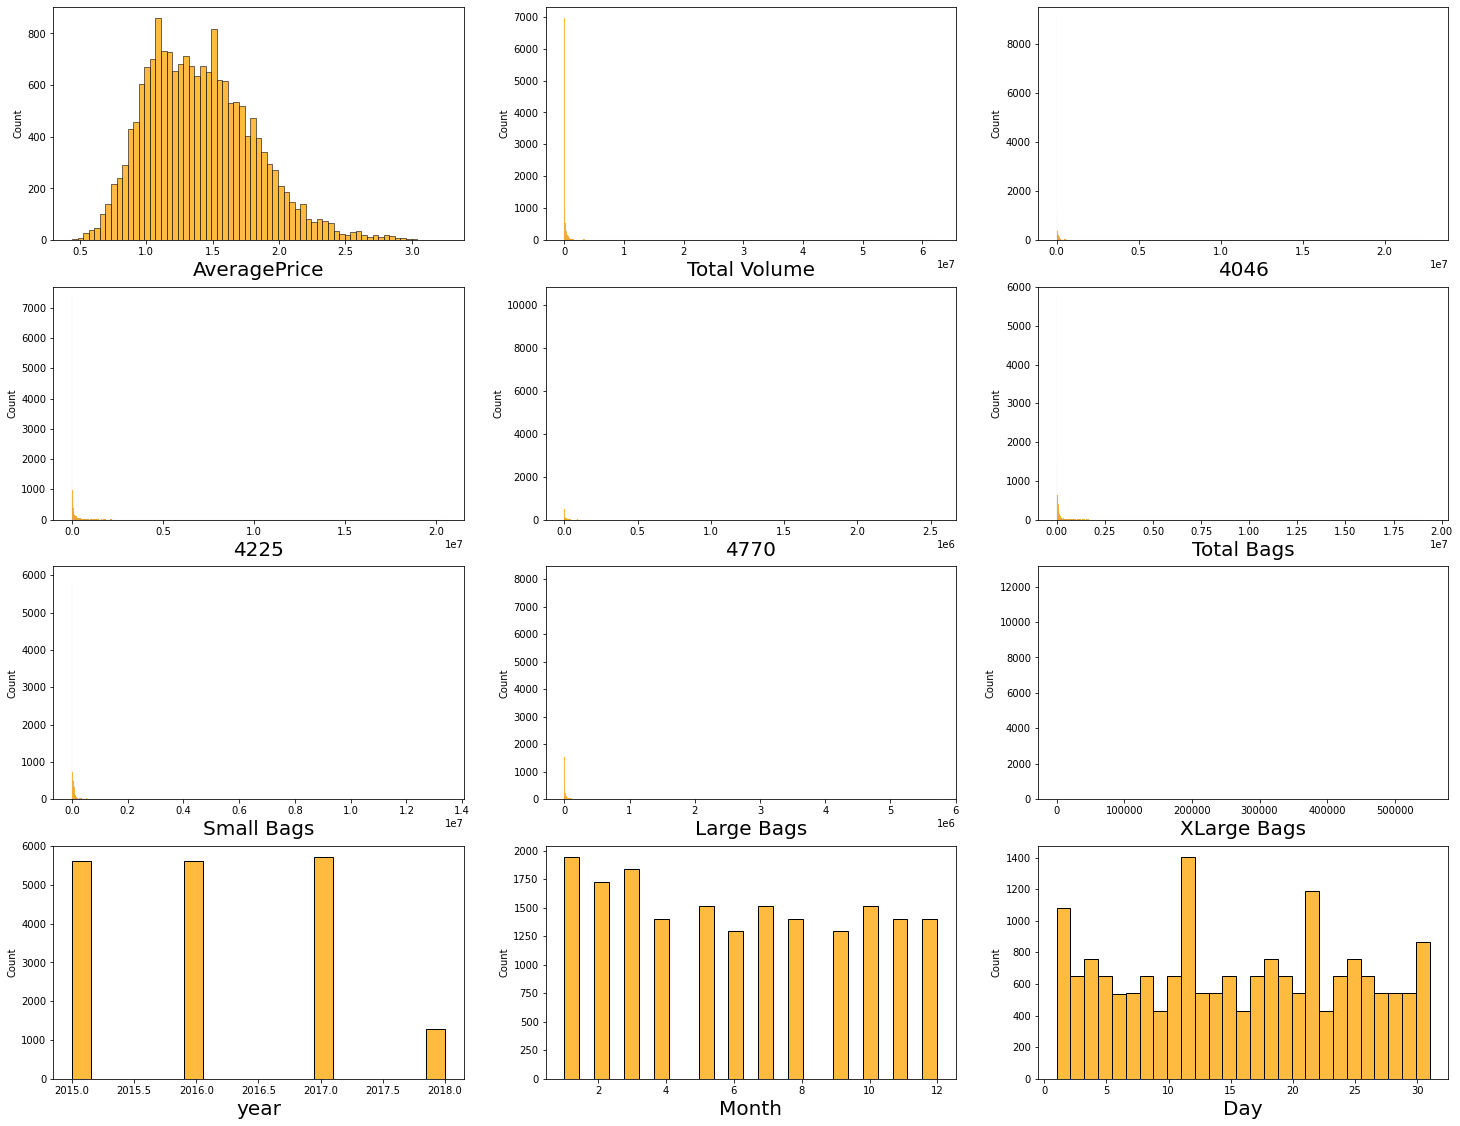

In [ ]:
# distribution of data by histogram
plt.figure(figsize = (25,30))
plotnumber = 1

for col in avacado_data.drop(['region','type'], axis = 1):
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(avacado_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

observation: data needs scaling too

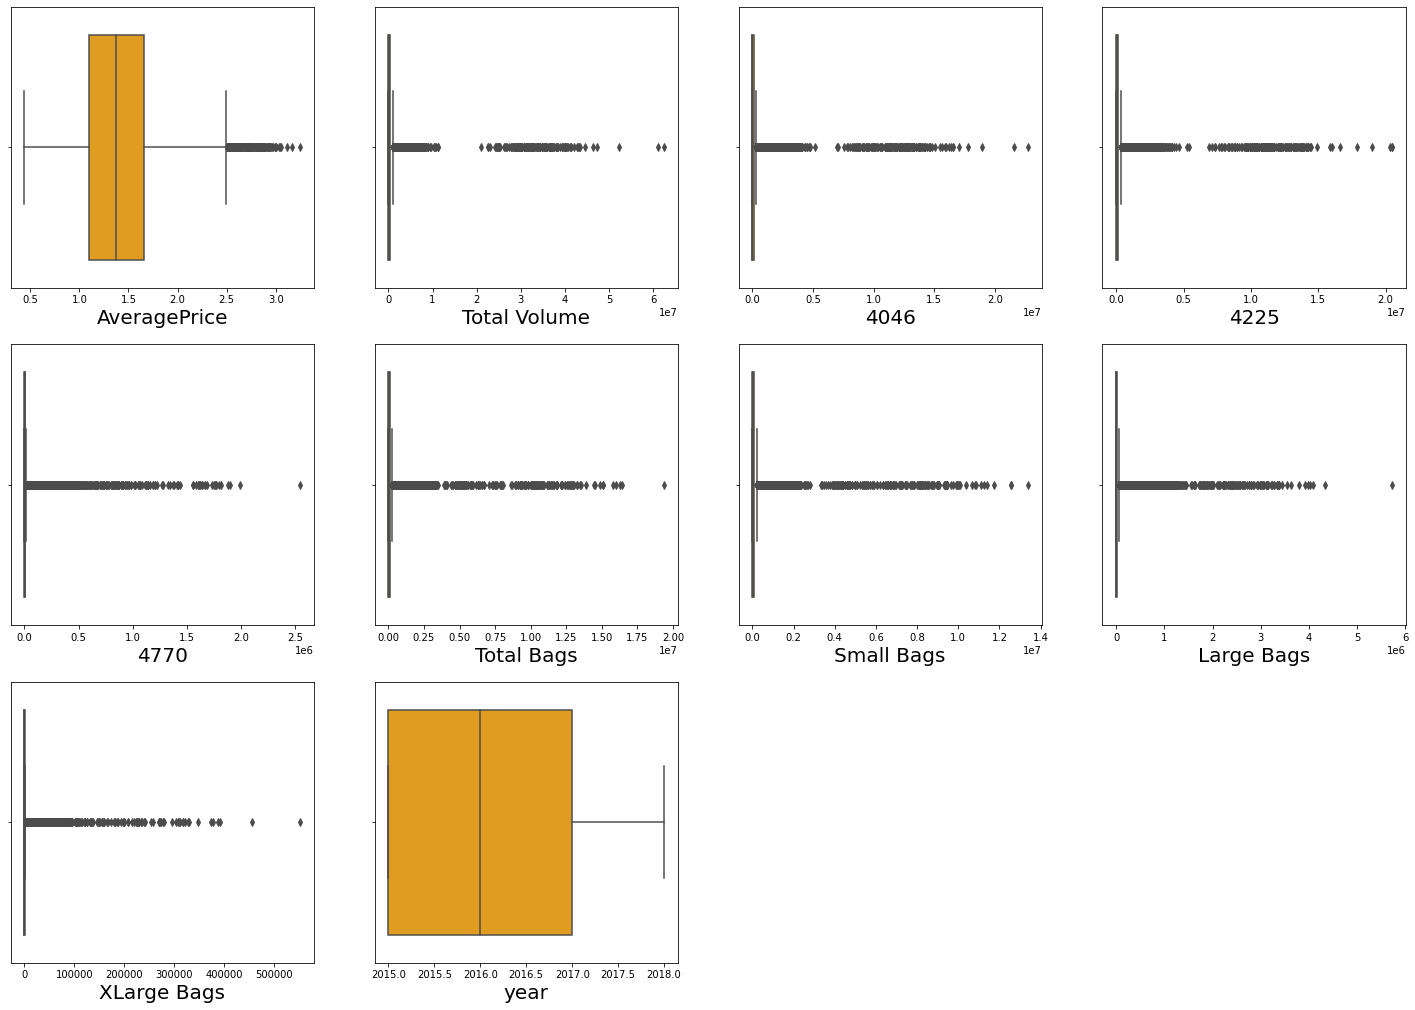

In [ ]:
## checking for Outliers
plt.figure(figsize = (25,30))
plotnumber = 1

for col in avacado_data.drop(['region','type'], axis = 1):
    if plotnumber <=10:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(avacado_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

conclusion from Boxplot most of the column shows outliers

## Bivariate analysis of Average Price(dependent variable) with other variables

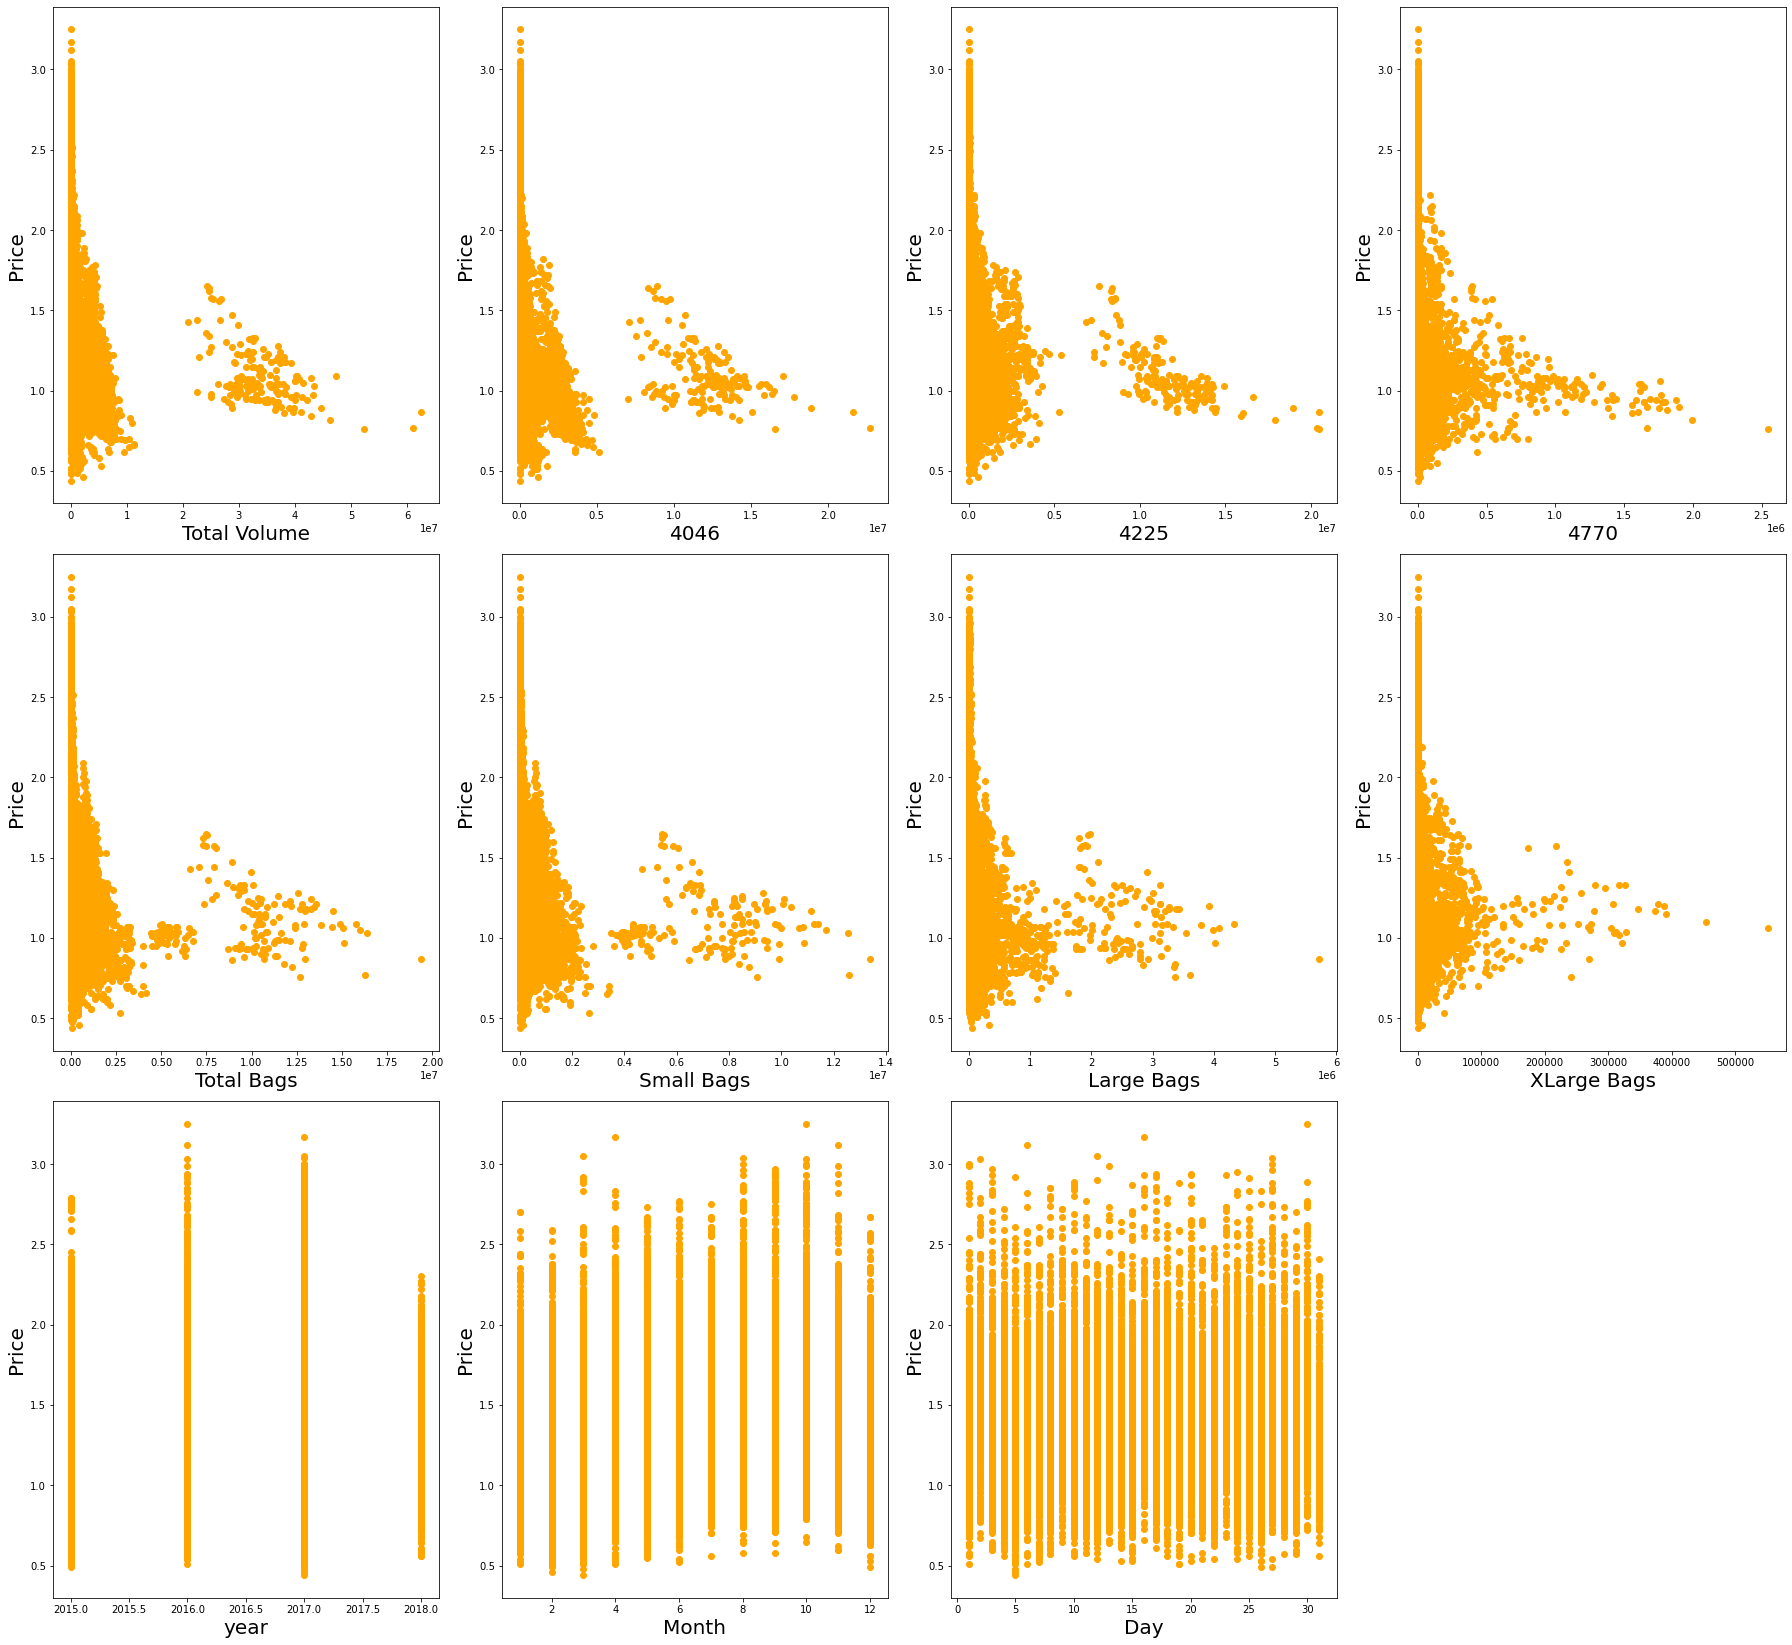

In [ ]:
# scatter plot of Every Column Vs Average price
plt.figure(figsize = (25,30))
plotnumber = 1

for col in avacado_data.drop(['region','type','AveragePrice'], axis = 1):
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(avacado_data[col],avacado_data['AveragePrice'], color='orange')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber += 1
plt.tight_layout()

Conclusion: can see clusters here and there

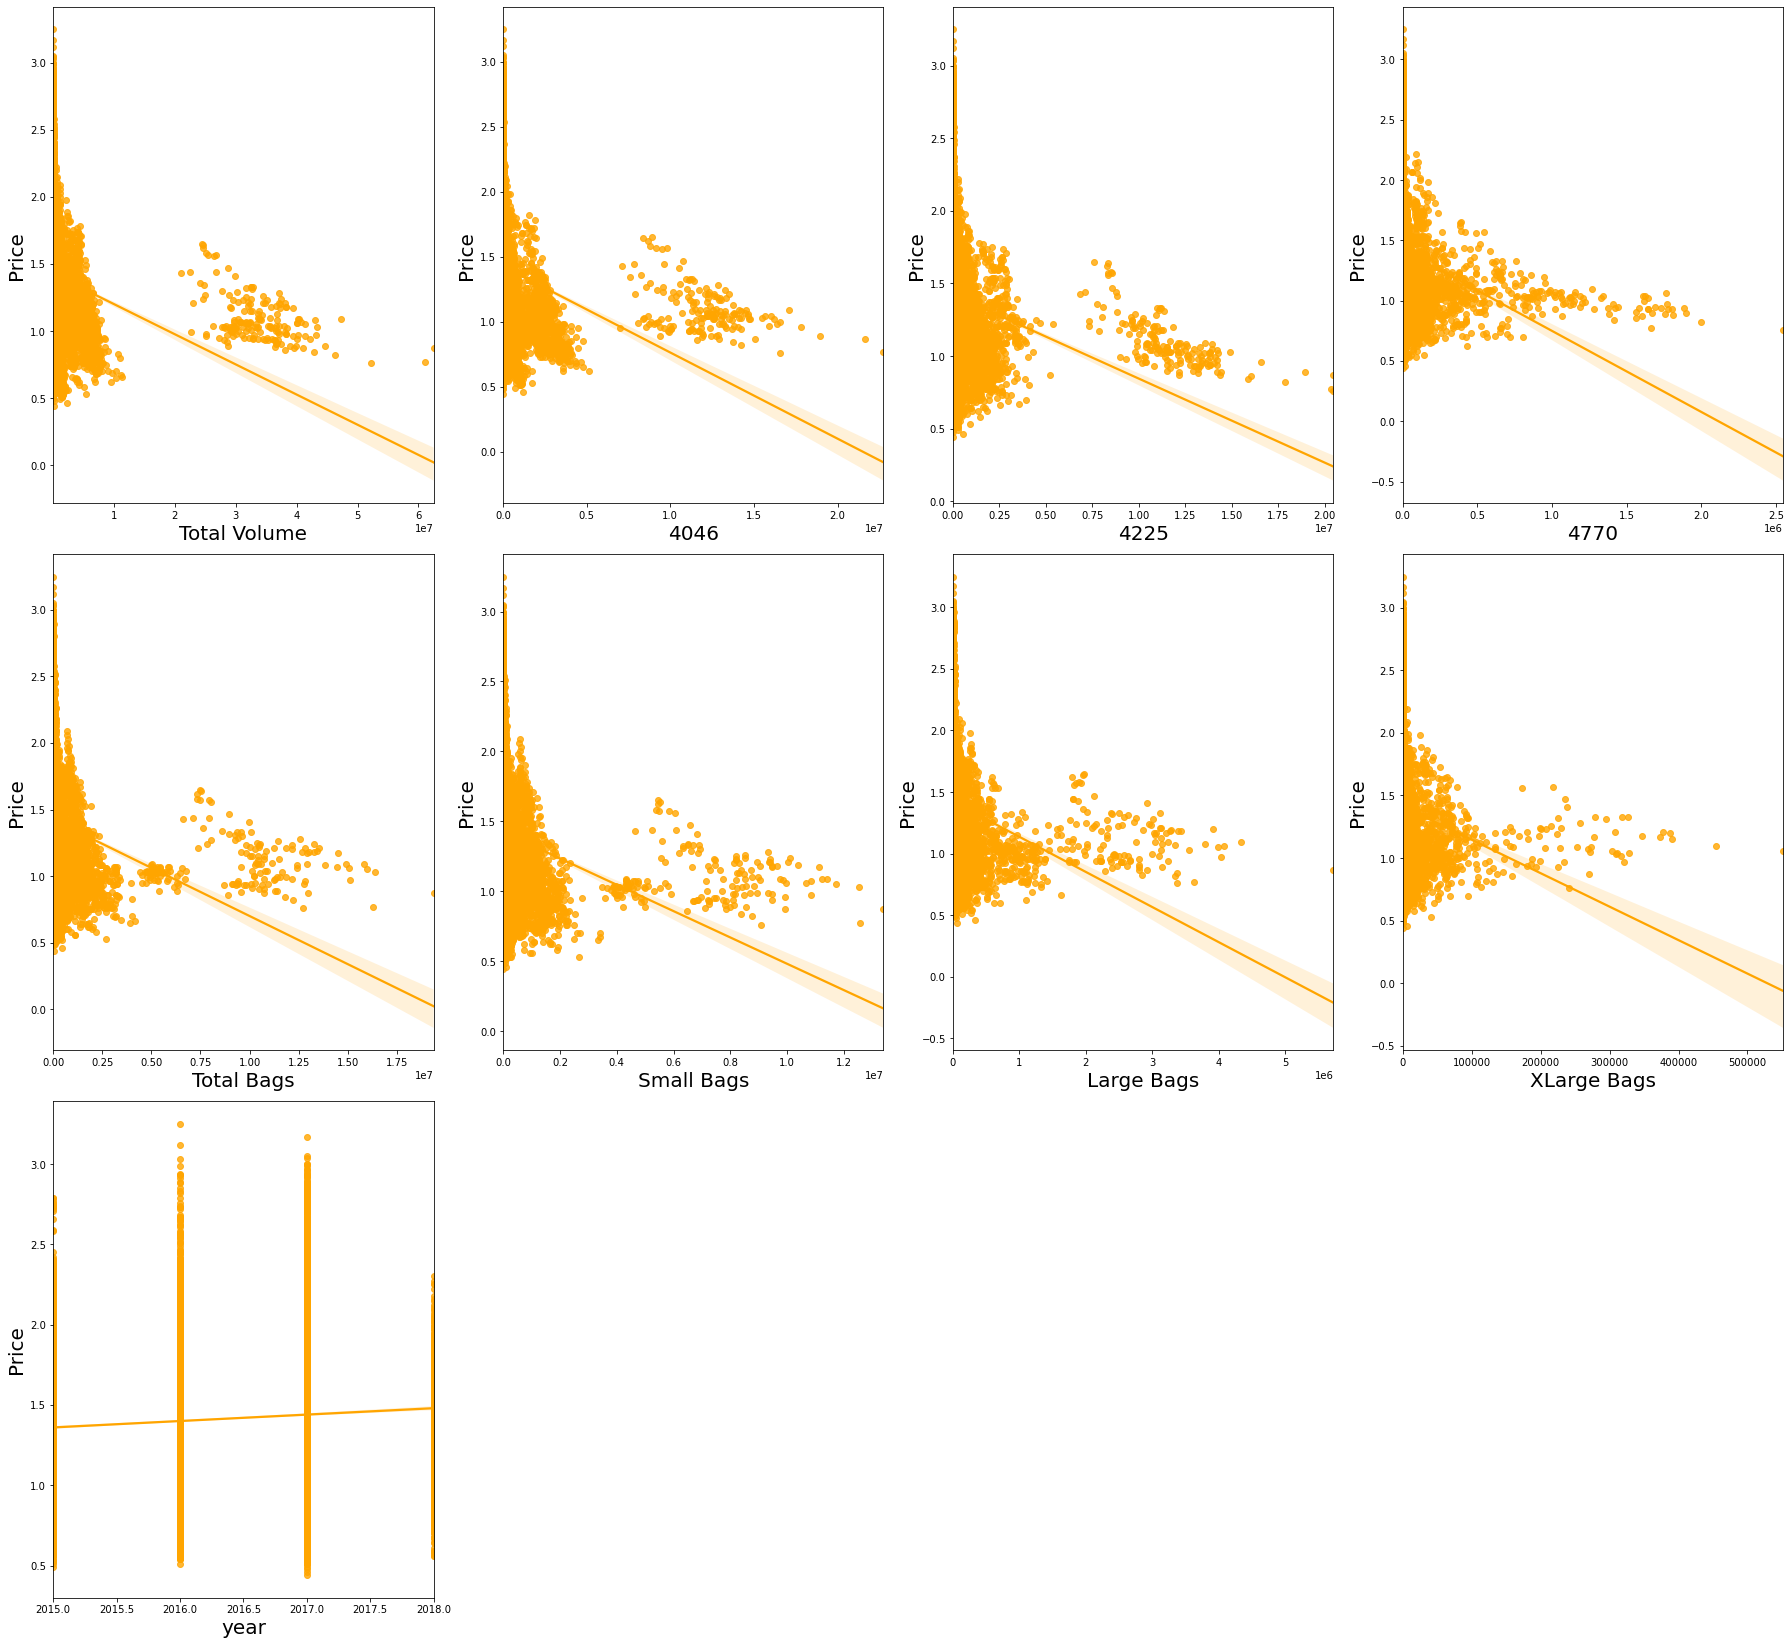

In [ ]:
# Regression plot of Every Column Vs average price to confirm the conclusion

plt.figure(figsize = (25,30))
plotnumber = 1

for col in avacado_data.drop(['region','type','AveragePrice'], axis = 1):
    if plotnumber <=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.regplot(avacado_data[col],avacado_data['AveragePrice'], color='orange')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber += 1
plt.tight_layout()

Conclusion: not even a single element shows direct relation

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

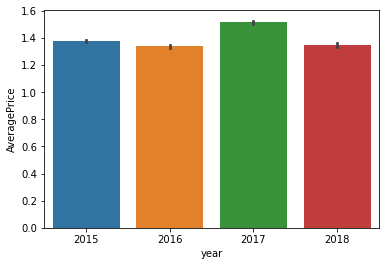

In [ ]:
sns.barplot(x=avacado_data.year, y=avacado_data.AveragePrice)

Conclusion: not much difference year- wise

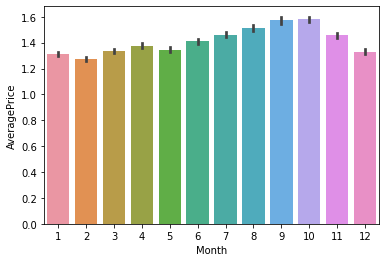

In [ ]:
sns.barplot(x=avacado_data.Month, y=avacado_data.AveragePrice)

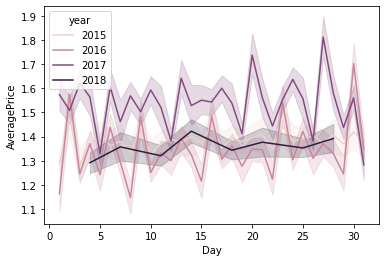

In [ ]:
sns.lineplot(x=avacado_data.Day, y=avacado_data.AveragePrice, hue=avacado_data.year)

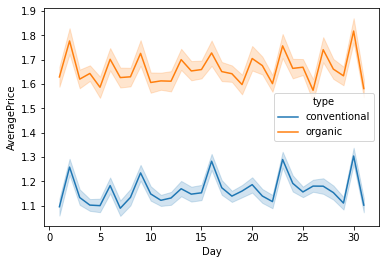

In [ ]:
sns.lineplot(x=avacado_data.Day, y=avacado_data.AveragePrice, hue=avacado_data.type)

Conclusion :hike in price on some days

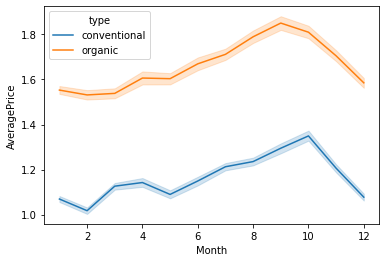

In [ ]:
sns.lineplot(x=avacado_data.Month, y=avacado_data.AveragePrice, hue=avacado_data.type)

conclusion: they is sudden in the price around september to november 

Text(0.5, 1.0, 'Average Price of Avacado According to Region')

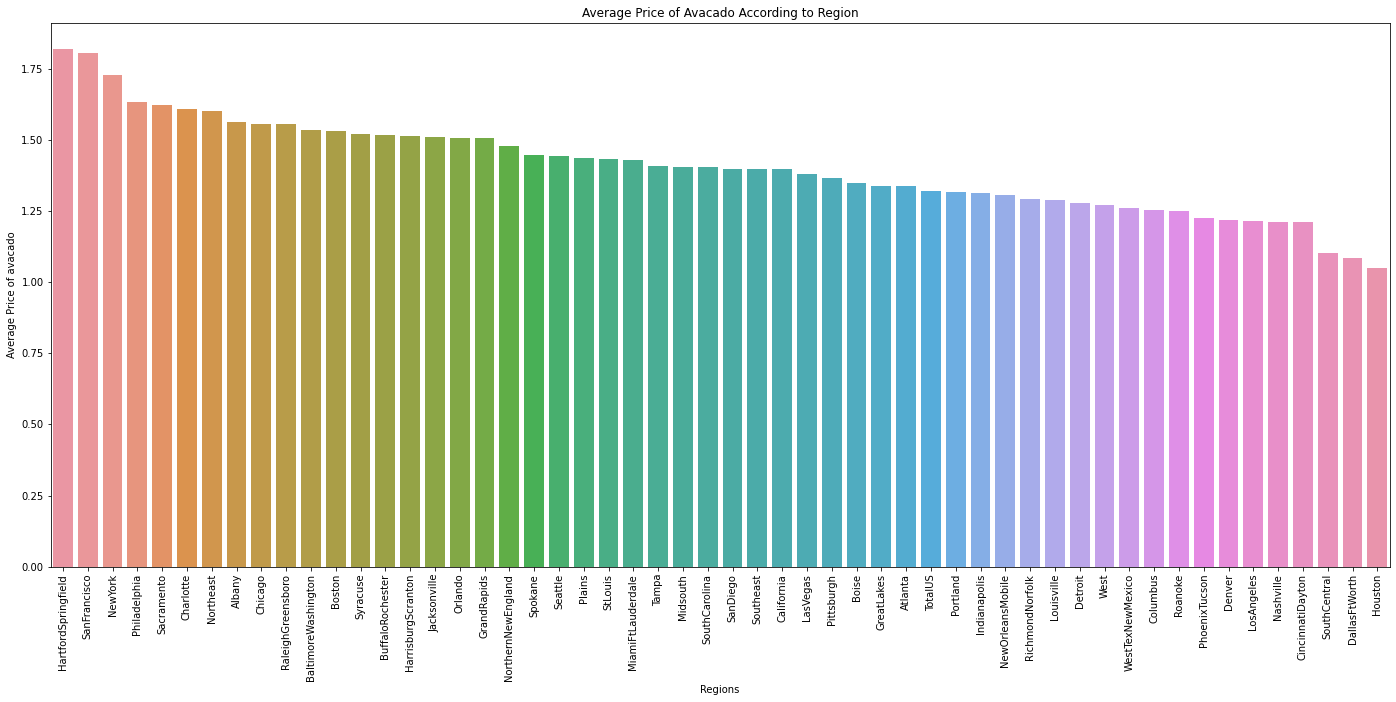

In [ ]:
region_unique=list(avacado_data.region.unique())
averageprice=[]

for i in region_unique:
    x=avacado_data[avacado_data['region']==i]
    region_average=sum(x.AveragePrice)/len(x)
    averageprice.append(region_average)

df=pd.DataFrame({'region_unique':region_unique,'Average_price':averageprice})
new_index=df.Average_price.sort_values(ascending=False).index.values
data_sort=df.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=data_sort.region_unique,y=data_sort.Average_price)

plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Average Price of avacado')
plt.title('Average Price of Avacado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According v/s Region')

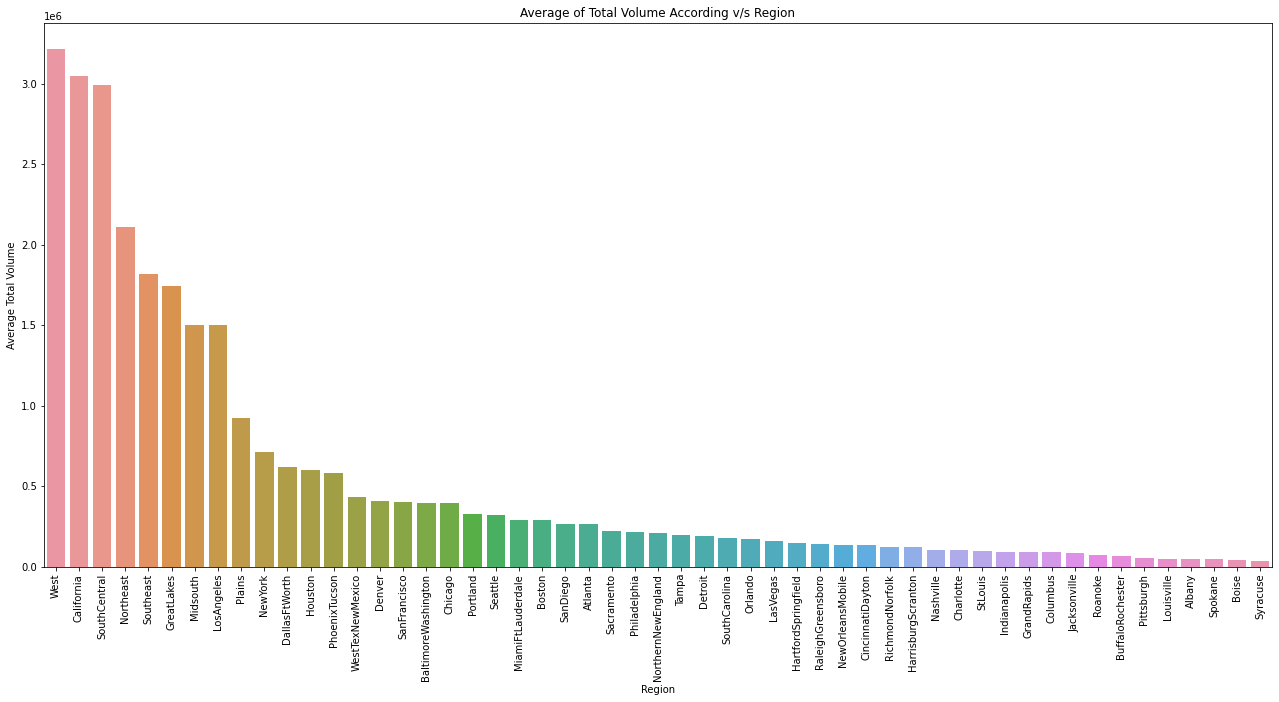

In [181]:
filter_data=avacado_data.region!='TotalUS'
df=avacado_data[filter_data]

region_Unique=list(df.region.unique())
averageTotalVolume=[]

for i in region_Unique:
    x=avacado_data[avacado_data.region==i]
    averageTotalVolume.append(sum(x['Total Volume'])/len(x))
df=pd.DataFrame({'region_unique':region_Unique,'Average_Total_Volume':averageTotalVolume})

new_=df.Average_Total_Volume.sort_values(ascending=False).index.values
data_sort=df.reindex(new_)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=data_sort.region_unique,y=data_sort.Average_Total_Volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Total Volume')
plt.title('Average of Total Volume According v/s Region')

## Multivariate analysis

<Figure size 3600x3600 with 0 Axes>

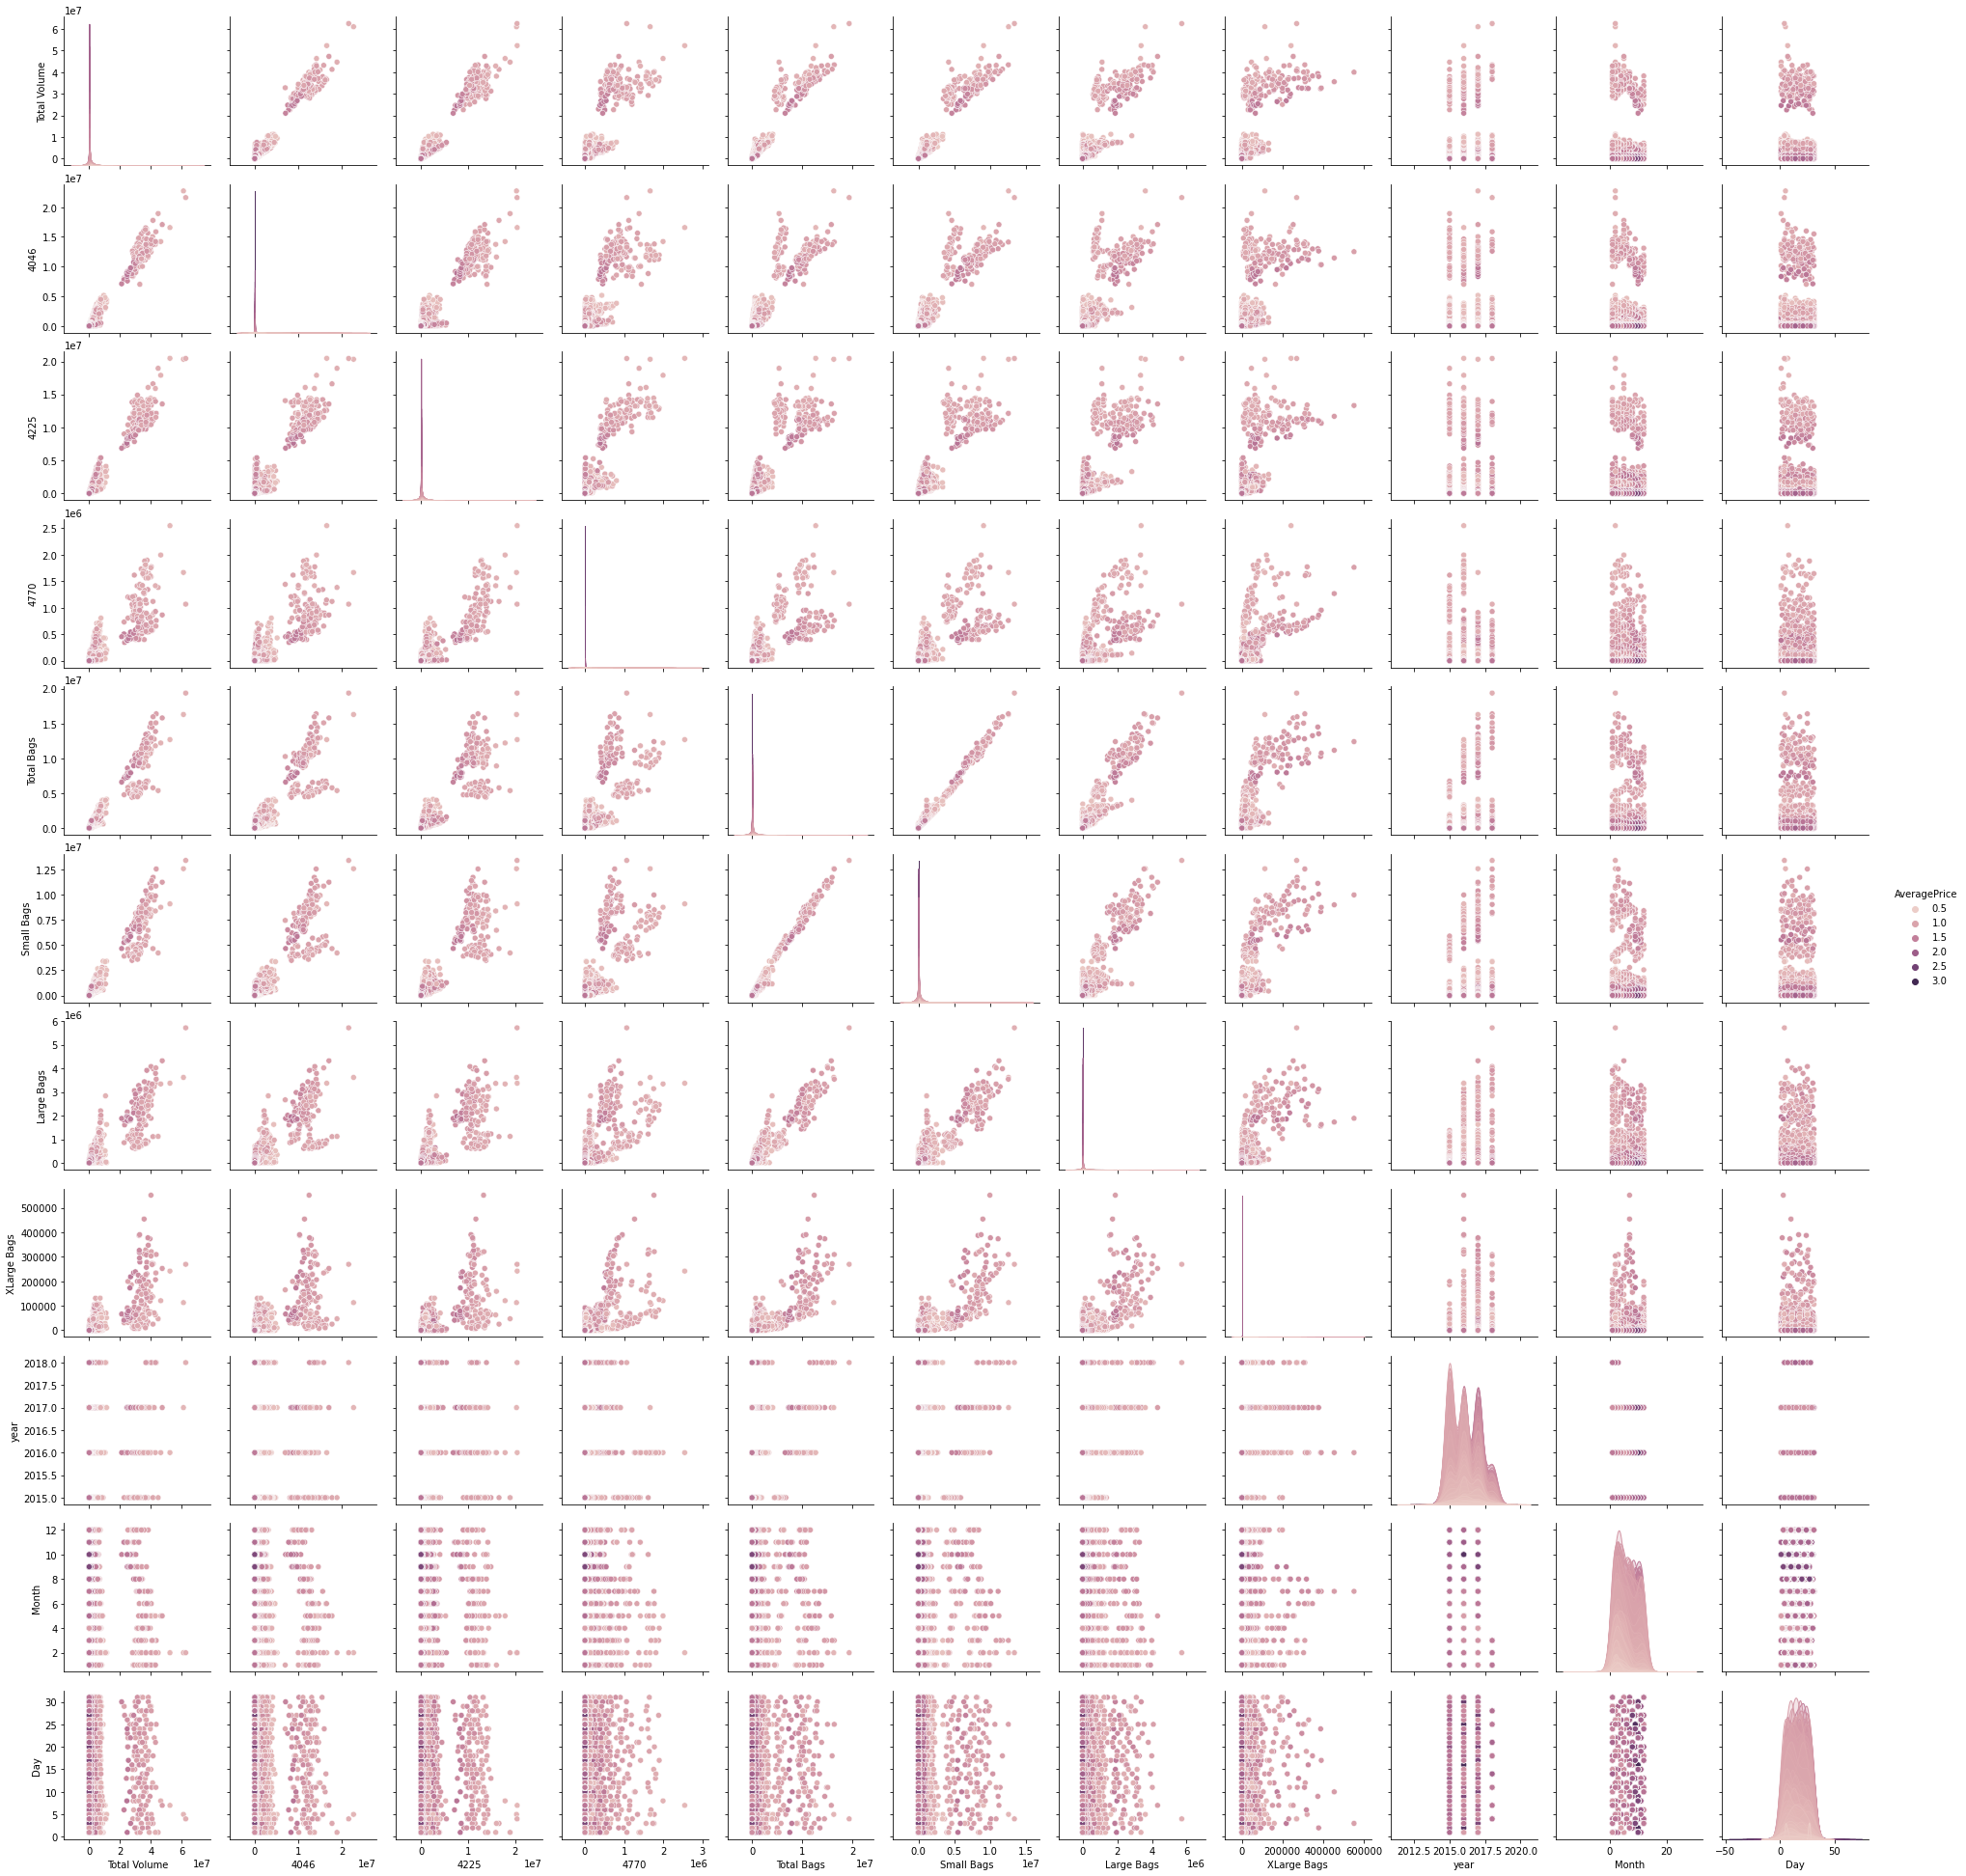

In [ ]:
plt.figure(figsize = (50,50))
sns.pairplot(avacado_data.drop(['region','type'], axis = 1),hue='AveragePrice')
plt.show()

## Heat map

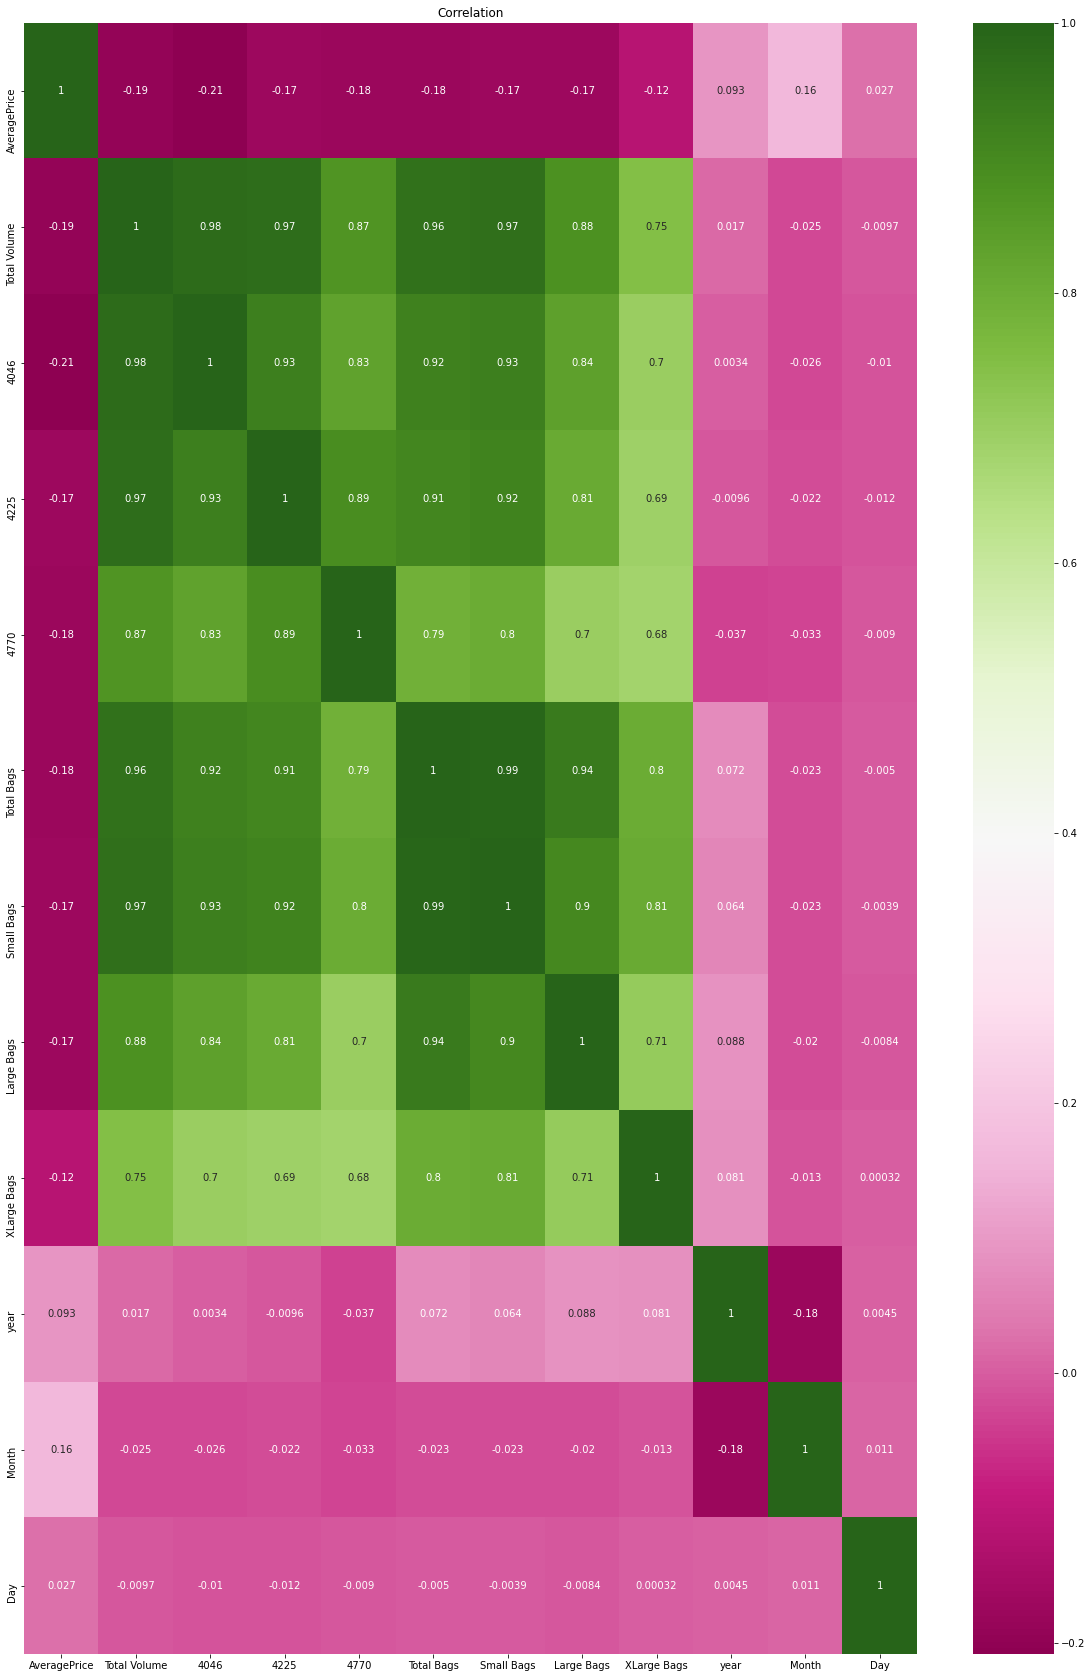

In [ ]:
plt.figure(figsize = [20, 30])
sns.heatmap(avacado_data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

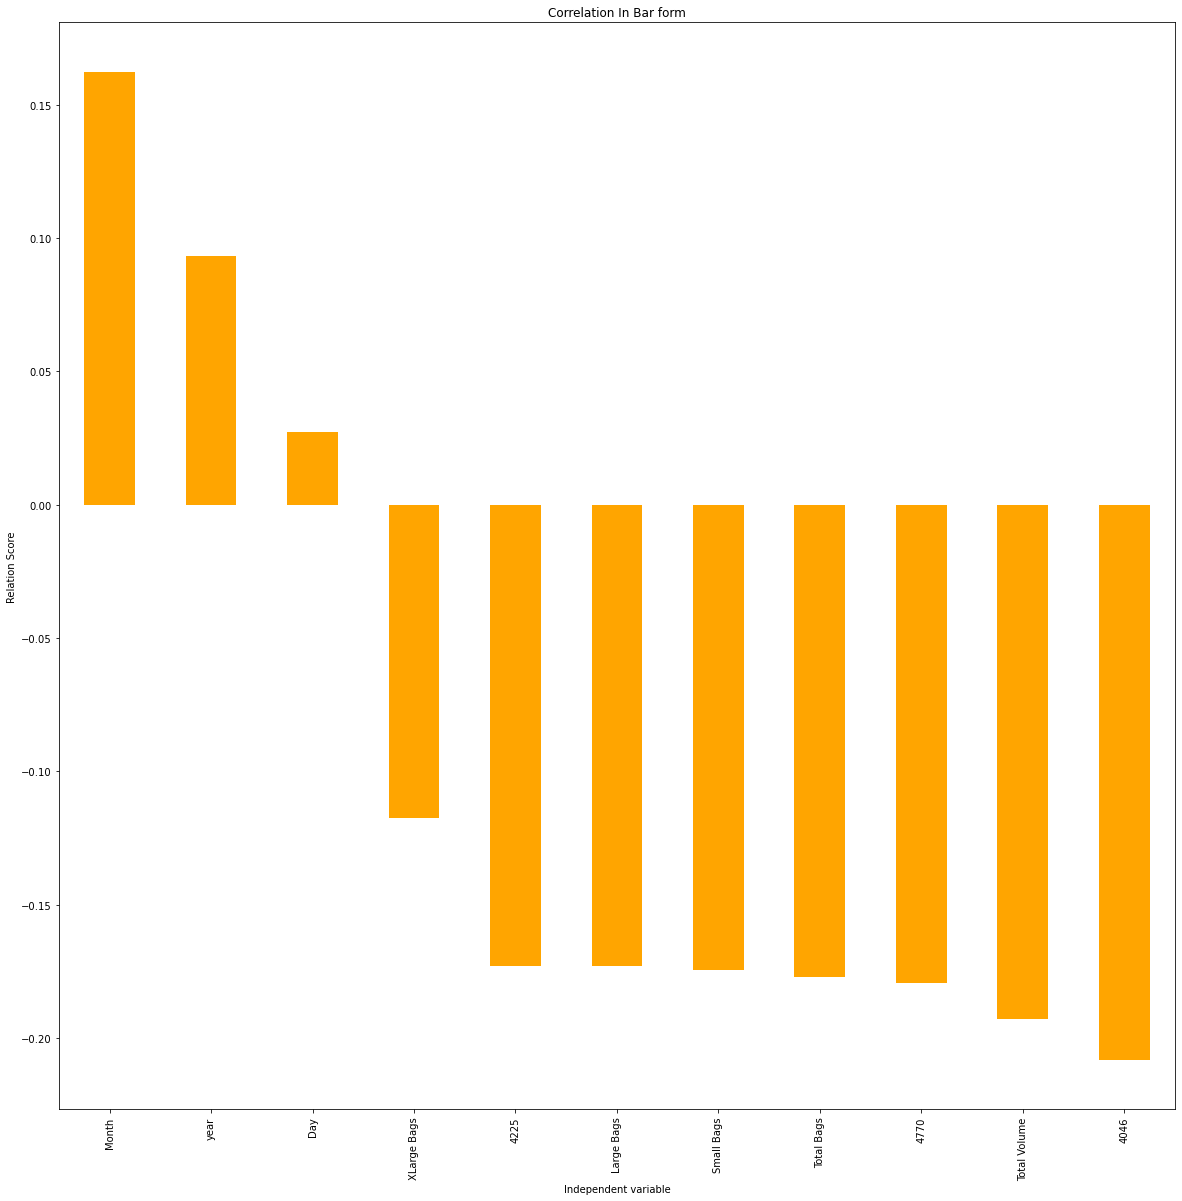

In [ ]:
# relation of Average_Price with every column
plt.figure(figsize =(20, 20))
avacado_data.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='Orange')
plt.xlabel('Independent variable')
plt.ylabel('Relation Score')
plt.title('Correlation In Bar form')
plt.show()

Conclusion: large Bags, small Bags , total bags have oalmost same relation there can be multi- collinearity

# Data Cleaning

In [48]:
#Checking for null values 
avacado_data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [49]:
## skewness in the cleaned Data

In [50]:
avacado_data.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

# skew score should lie between 0.5 to -0.5

In [ ]:
avacado_data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [54]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]=pt.fit_transform(avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']])

avacado_data.skew().sort_values(ascending=False)


XLarge Bags     0.793520
AveragePrice    0.580303
year            0.215339
Month           0.106617
4770            0.032184
Day             0.014310
Total Volume    0.011171
Small Bags      0.007058
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
dtype: float64

In [ ]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]=pt.fit_transform(avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']])

avacado_data.skew().sort_values(ascending=False)

## can use another method 
## Other methods to remove skewness: Log transformation, square root transformation, BoxCox transformation

# we can use below mentioned method also

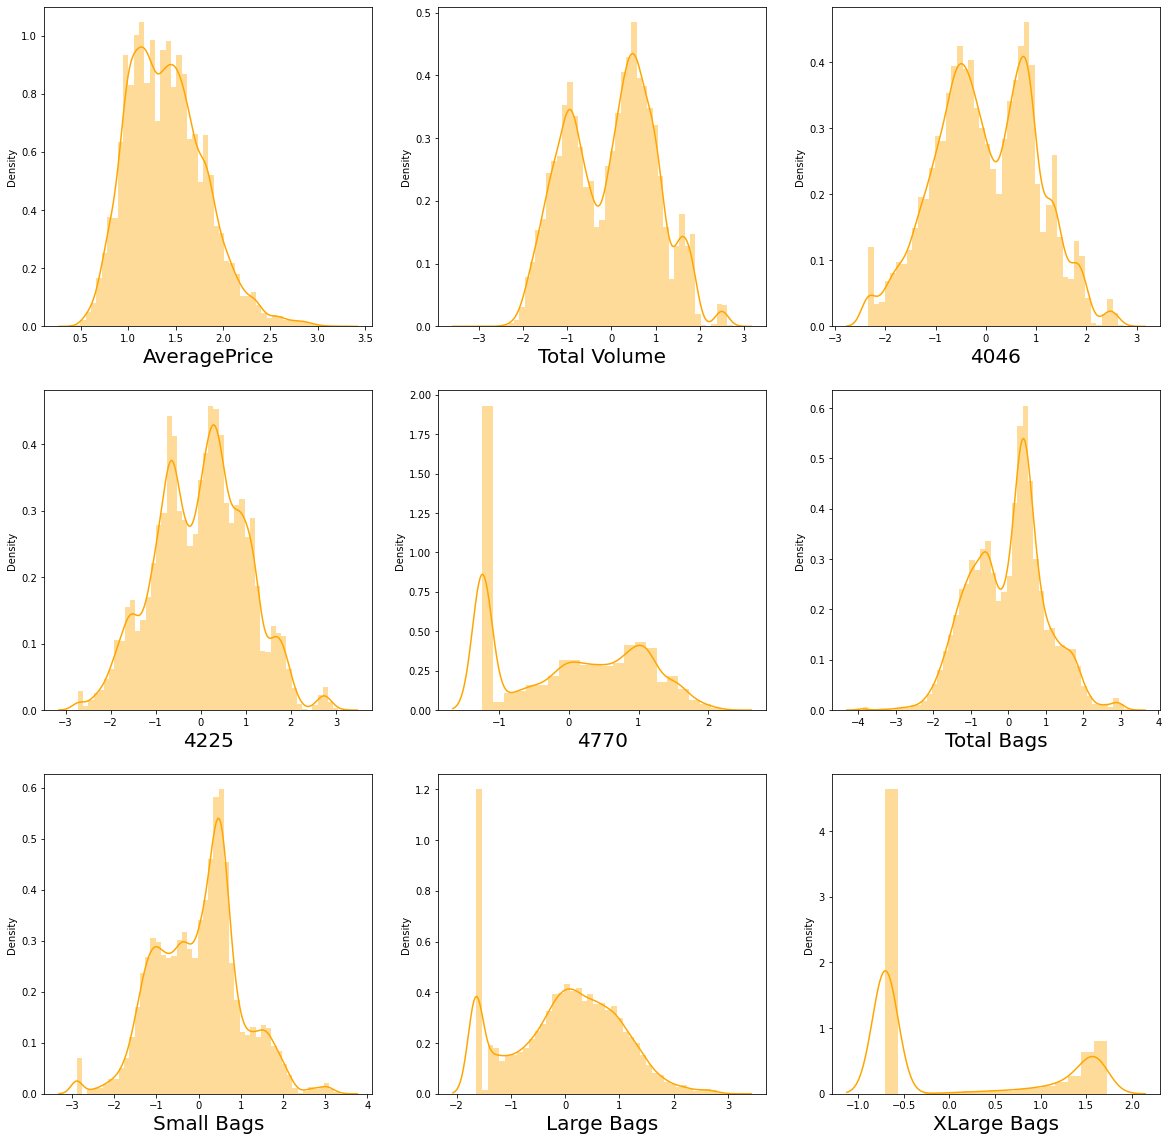

In [55]:
#checking how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,20))
plotnumber = 1

for column in avacado_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(avacado_data[column],color='Orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Variance inflation factor (checking for multi-collinearity)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(avacado_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']].values, i) 
               for i in range(avacado_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']].shape[1])], index=avacado_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']].columns)

AveragePrice     1.033618
Total Volume    44.857306
4046             6.750736
4225            10.691619
4770             3.651998
Total Bags      31.193464
Small Bags      15.476263
Large Bags       3.428845
XLarge Bags      1.888544
dtype: float64

In [68]:
# Conclusion : Total_volume and Total bags have the high values that shows multi collinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(avacado_data[['AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags']].values, i) 
               for i in range(avacado_data[['AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags']].shape[1])], index=avacado_data[['AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags']].columns)

AveragePrice    1.027983
4046            3.572501
4225            4.230299
4770            3.646556
Small Bags      3.690575
Large Bags      1.885071
XLarge Bags     1.887948
dtype: float64

## Dropping the columns total Bags and total volume

In [70]:
avacado_data.drop(['Total Volume','Total Bags'],axis=1,inplace=True)

# Using Dummy variable can also use Label Encoding

In [71]:
data=pd.get_dummies(avacado_data,drop_first=True)
data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,Day,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849,2015,12,27,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849,2015,12,20,...,0,0,0,0,0,0,0,0,0,0
2,0.93,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849,2015,12,13,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849,2015,12,6,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849,2015,11,29,...,0,0,0,0,0,0,0,0,0,0


# Splitting  Dependent and Independent Variable

In [72]:
features = data.drop(["AveragePrice"],axis=1)
target = data["AveragePrice"]

In [73]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

In [75]:
#@title Model -Building 


In [74]:
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        if acc>Maximum_Accuracy:
            Maximum_Accuracy=acc
            print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.6294752399850991 Train set accuracy 0.6427526472986846 Random state 0 test_size 0.2
R-square 0.6470282533267131 Train set accuracy 0.6383973498027854 Random state 1 test_size 0.2
R-square 0.6486703749836128 Train set accuracy 0.6379290748269919 Random state 20 test_size 0.2
R-square 0.6552998236440759 Train set accuracy 0.6361996043936484 Random state 50 test_size 0.2
R-square 0.6659786385849018 Train set accuracy 0.6332057039835317 Random state 113 test_size 0.2


# we will consider random state=113 and test size=0.2 as this has almost same accuracy on both train and test dataset

In [76]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=113)

In [77]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1.Linear-Regression

In [78]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr.score(x_train,y_train))

0.6332057039835317


In [82]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))
print('RMSE Score',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

MSE: 0.055494786355871926
MAE: 0.17613609875437566
r2_score: 0.47720507595861916
RMSE Score 0.2355733141845059


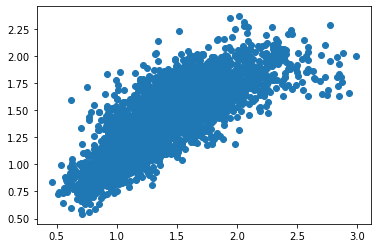

In [83]:
plt.scatter(x=y_test,y=lr_pred)

# The increasing scatter plot confirms that the model is predicting values but it needs to be tunned

In [84]:
# creating empty list that will help us in the end to judge the best model
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]

In [85]:
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

# 2.Ridge-Regression

In [92]:
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=Ridge()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        if acc>Maximum_Accuracy:
              Maximum_Accuracy=acc
              print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.6294825432327786 Train set accuracy 0.6427523870667362 Random state 0 test_size 0.2
R-square 0.6470343590952533 Train set accuracy 0.6383970965771317 Random state 1 test_size 0.2
R-square 0.6486812306340348 Train set accuracy 0.6379288062885347 Random state 20 test_size 0.2
R-square 0.6553054572103278 Train set accuracy 0.6361993502045418 Random state 50 test_size 0.2
R-square 0.6659771545946647 Train set accuracy 0.6332054639434026 Random state 113 test_size 0.2


In [93]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=113)

In [94]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 1, 'solver': 'auto'}


In [95]:
rr=Ridge(alpha=5,solver='auto')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,rr_pred))
print('mse:',metrics.mean_squared_error(y_test,rr_pred))
print('mae:',metrics.mean_absolute_error(y_test,rr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))

R2_score: 0.6659675289122784
mse: 0.0554966321327591
mae: 0.1761382607401886
rmse: 0.23557723177921736


In [96]:
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(y_test,rr_pred))
model_name.append("ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))

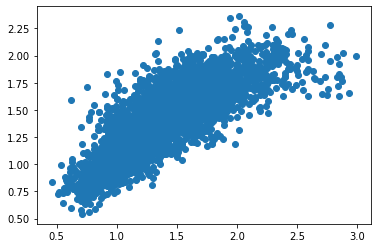

In [97]:
plt.scatter(x=y_test,y=rr_pred)

# 3. Random Forest

In [98]:
Maximum_Accuracy=0

test_size=[0.2,0.25,0.30]
for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=RandomForestRegressor()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.8970388313833818 Train set accuracy 0.9862710024690924 Random state 0 test_size 0.2
R-square 0.9055809246617871 Train set accuracy 0.9863263076279509 Random state 1 test_size 0.2
R-square 0.9096555370639722 Train set accuracy 0.9862623866596124 Random state 6 test_size 0.2
R-square 0.9105613793157569 Train set accuracy 0.9862129571989927 Random state 21 test_size 0.2
R-square 0.9120610618536205 Train set accuracy 0.9858222256295871 Random state 41 test_size 0.2
R-square 0.9139214196599152 Train set accuracy 0.9857167755863334 Random state 94 test_size 0.2


In [99]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.20,random_state=94)

In [101]:
model=RandomForestRegressor()
param_grid = { "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
            }
grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


In [106]:
RF=RandomForestRegressor(n_estimators= 30,max_features= "sqrt",min_samples_split = 2,bootstrap=False)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

R2_score: 0.9123150218720382
mse: 0.014258132085235922
mae: 0.08564940639269406
rmse: 0.11940742056185588


In [107]:
mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

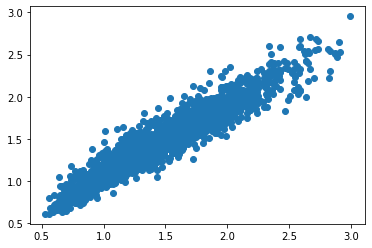

In [108]:
plt.scatter(x=y_test,y=RF_pred)

# 4. Xgboost-Regressor

In [112]:
import warnings
warnings.filterwarnings('ignore')
Maximum_Accuracy=0

test_size=[0.2,0.25,0.30]

for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)

        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.7227822028379431 Train set accuracy 0.7404305325550677 Random state 0 test_size 0.2
R-square 0.7305757706469636 Train set accuracy 0.7384742035561578 Random state 1 test_size 0.2
R-square 0.7318781823159788 Train set accuracy 0.7388460734821933 Random state 3 test_size 0.2
R-square 0.7338520944702259 Train set accuracy 0.7406074092647458 Random state 5 test_size 0.2
R-square 0.7455122791209339 Train set accuracy 0.7434810949405845 Random state 8 test_size 0.2
R-square 0.7471228916300224 Train set accuracy 0.7354388149206554 Random state 50 test_size 0.2


In [113]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=50)

In [114]:
xgb1 = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
parameters = {'learning_rate': [0.1,0.01,1],
              'max_depth': [3,5,7,9],
              'n_estimators': [1,3,5,7,10],
              "gamma":[ 0.0, 0.1, 0.2,0.3]}

xgb_grid = GridSearchCV(xgb1,parameters)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

{'gamma': 0.1, 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 10}


In [116]:
Xg=XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42,gamma=0.1,learning_rate= 1,max_depth= 9,n_estimators= 10)
Xg.fit(x_train,y_train)
Xg_pred=Xg.predict(x_test)
print('R2_score:',r2_score(y_test,Xg_pred))
print('mse:',metrics.mean_squared_error(y_test,Xg_pred))
print('mae:',metrics.mean_absolute_error(y_test,Xg_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

R2_score: 0.8410670684459284
mse: 0.026914358522222695
mae: 0.11995076883949644
rmse: 0.16405596155648441


In [117]:
mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

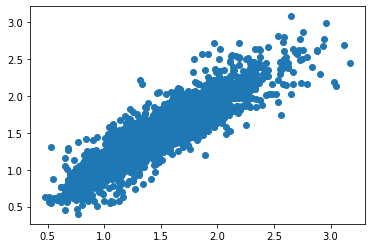

In [118]:
plt.scatter(x=y_test,y=Xg_pred)

In [120]:
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,linear_regression,0.055495,0.176136,0.235573,0.477205
1,ridge_regression,0.055497,0.176138,0.235577,0.665968
2,Random_forest_regression,0.014258,0.085649,0.119407,0.912315
3,XGboost_regression,0.026914,0.119951,0.164056,0.841067


## Conclusion: We are best results with random Forest Regressor 

## thus we will pick the Random Forest model

## other model that we can try are ADABOOST, NBGAUSSIAN,LASSO  etc. 

# Maximum R- squared was 0.91

In [ ]:
#pickle file of the model

In [121]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("AvacadoCaseStudy.pkl","wb") # name of my pickle file , wb -write
pickle.dump(RF, pickle_out)
pickle_out.close()

In [122]:
# loading the pickeled model
pickle_in = open("AvacadoCaseStudy.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

In [123]:
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
Predicted,1.81,1.133333,1.52,1.16,0.76,2.11,0.98,1.85,1.5,0.8,...,1.47,1.46,1.5,0.613333,1.513,1.66,0.9,1.18,1.93,1.76
Original,1.81,1.220000,1.52,1.16,0.76,2.11,0.98,1.85,1.5,0.8,...,1.47,1.46,1.5,0.530000,1.570,1.66,0.9,1.18,1.93,1.76


# Done with the Avocado data as case of Regression problem , Study completed

# Avocado data as case of classification problem, begins

In [8]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
avacado_data=pd.read_csv('/avocado.csv')
avacado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avacado_data.drop('Unnamed: 0',axis=1,inplace=True)


In [10]:
avacado_data['Month']=0
avacado_data['Day']=0
for i in range(len(avacado_data.Date)):
    k=avacado_data.Date[i].split("-")
    avacado_data['Month'][i]=k[1]
    avacado_data['Day'][i]=k[2]
avacado_data.drop(['Date'],axis=1,inplace=True)
avacado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]=pt.fit_transform(avacado_data[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']])

avacado_data.skew().sort_values(ascending=False)

XLarge Bags     0.793520
AveragePrice    0.580303
year            0.215339
Month           0.106617
4770            0.032184
Day             0.014310
Total Volume    0.011171
Small Bags      0.007058
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
dtype: float64

In [12]:
avacado_data.drop(['Total Bags','Total Volume'],axis=1,inplace=True)

In [13]:
avacado_data['type']=pd.get_dummies(avacado_data['type'],drop_first=True)

In [14]:
avacado_data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
df=avacado_data
# label Encoding
from sklearn import preprocessing
  
# label_encoder 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'region'.
df['region']= label_encoder.fit_transform(df['region'])
  
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [16]:
list1=['AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']
for i in list1:
  df[i]=df[i].round(decimals =2)

In [17]:
features = df.drop(["region"],axis=1)
target = df["region"]
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

In [18]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.66,0.31,-0.25,-0.34,-0.77,-0.7,0,2015,0,12,27
1,1.35,-0.78,0.23,-0.20,-0.31,-0.76,-0.7,0,2015,0,12,20
2,0.93,-0.73,0.58,-0.01,-0.37,-0.75,-0.7,0,2015,0,12,13
3,1.08,-0.63,0.42,-0.15,-0.50,-0.69,-0.7,0,2015,0,12,6
4,1.28,-0.69,0.22,-0.14,-0.48,-0.60,-0.7,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.47,-0.92,-1.24,-0.18,-0.41,-0.7,1,2018,53,2,4
18245,1.71,-0.62,-0.67,-1.24,-0.33,-0.48,-0.7,1,2018,53,1,28
18246,1.87,-0.62,-0.77,0.40,-0.31,-0.94,-0.7,1,2018,53,1,21
18247,1.93,-0.55,-0.71,0.40,-0.25,-0.91,-0.7,1,2018,53,1,14


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
classification=[KNeighborsClassifier(n_neighbors=54),DecisionTreeClassifier(criterion = 'entropy'),RandomForestClassifier()]

for model in classification:
  print(model)
  for j in test_size:
      for i in range(100):
          x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)
          model.fit(x_train,y_train)
          pred= model.predict(x_test)
          acc=accuracy_score(y_test,pred)
          check=model.predict(x_train)
          check_acc=accuracy_score(y_train,check)
        
          if acc>Maximum_Accuracy:
              Maximum_Accuracy=acc
              print("Accuracy_score",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

KNeighborsClassifier(n_neighbors=54)
Accuracy_score 0.5101369863013698 Train set accuracy 0.6097677923145421 Random state 0 test_size 0.2
Accuracy_score 0.5112328767123288 Train set accuracy 0.6038769778751969 Random state 3 test_size 0.2
Accuracy_score 0.5115068493150685 Train set accuracy 0.6044934584560586 Random state 5 test_size 0.2
Accuracy_score 0.5164383561643836 Train set accuracy 0.6039454757175149 Random state 6 test_size 0.2
Accuracy_score 0.5186301369863013 Train set accuracy 0.6002465922323447 Random state 13 test_size 0.2
Accuracy_score 0.5194520547945205 Train set accuracy 0.6009315706555244 Random state 26 test_size 0.2
Accuracy_score 0.5254794520547945 Train set accuracy 0.6057264196177821 Random state 34 test_size 0.2
Accuracy_score 0.5298630136986301 Train set accuracy 0.6001780943900267 Random state 51 test_size 0.2
DecisionTreeClassifier(criterion='entropy')
Accuracy_score 0.816986301369863 Train set accuracy 1.0 Random state 0 test_size 0.2
Accuracy_score 0.81808

we can see that the Random Forest Classifier  has the maximum accuracy

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                        random_state=51)


# Create a based model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
acc=accuracy_score(y_test,pred)

In [22]:
acc

0.930958904109589

In [24]:
# round(RF_pred,-2
# RF_pred.round(decimals = 0)
RF_pred=pred.astype(int)
pd.DataFrame([RF_pred,y_test],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,46,7,14,1,22,19,50,6,40,42,...,0,13,46,24,20,19,40,49,12,3
Original,46,7,14,1,22,19,31,6,40,42,...,0,13,46,24,20,19,40,49,12,3


In [27]:
from sklearn.metrics import accuracy_score,f1_score, classification_report
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.93      0.88      0.90        73
           2       1.00      0.97      0.99        70
           3       0.78      0.90      0.84        63
           4       0.98      0.97      0.98        63
           5       0.84      0.97      0.90        59
           6       1.00      0.99      0.99        67
           7       0.94      0.92      0.93        71
           8       1.00      0.98      0.99        61
           9       0.96      0.94      0.95        79
          10       0.90      0.90      0.90        72
          11       0.97      0.97      0.97        73
          12       0.96      0.96      0.96        83
          13       0.88      0.90      0.89        72
          14       0.96      0.88      0.92        78
          15       0.99      1.00      0.99        79
          16       0.98      0.98      0.98        58
          17       0.95    

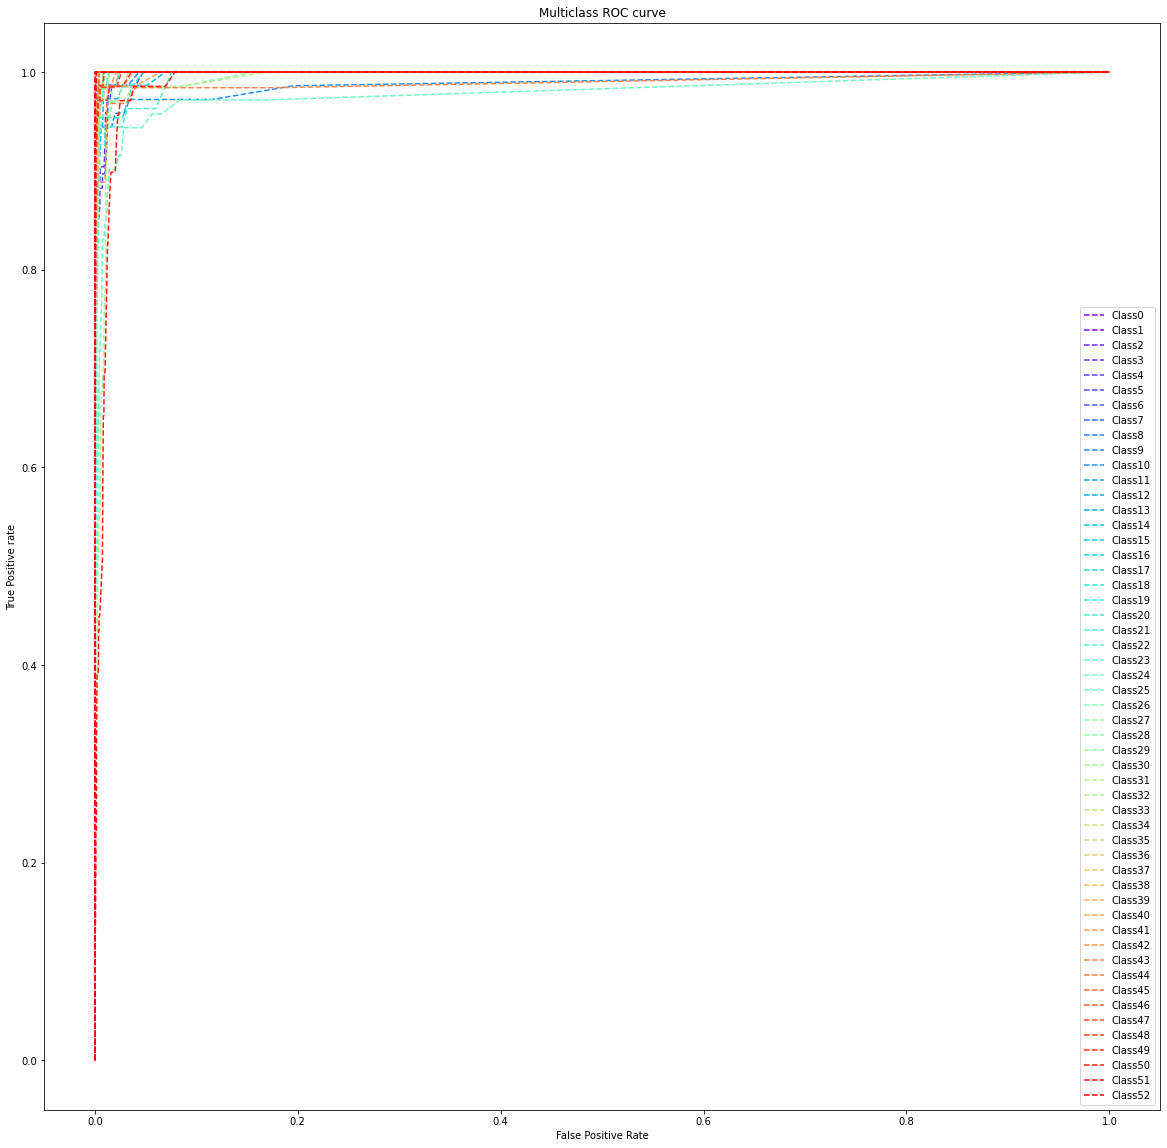

In [85]:
#roc auc score
plt.figure(figsize=(20, 20))
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_pred_cnb=rf.predict_proba(x_test)
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 53
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, n_class)))


for i in range(n_class): 
  c = next(color) 
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
  plt.plot(fpr[i], tpr[i], linestyle='--',color=c, label='Class'+str(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [87]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("AvacadoCaseStudy_classification.pkl","wb") # name of my pickle file , wb -write
pickle.dump(rf, pickle_out)
pickle_out.close()

In [88]:
# loading the pickeled model
pickle_in = open("AvacadoCaseStudy_classification.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

In [89]:
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,46,7,14,1,22,19,50,6,40,42,...,0,13,46,24,20,19,40,49,12,3
Original,46,7,14,1,22,19,31,6,40,42,...,0,13,46,24,20,19,40,49,12,3


## done with the classification problem too